In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Timing results from isclose versus direct comparison 

In [77]:
r = 5.5
ri=4.3
dr = 1.5 
def p1():
    for i in np.arange(100000):
        np.isclose(r,ri,atol=dr)
def p2():
    for i in np.arange(100000):
        r+dr<ri or r-dr>ri

In [78]:
%timeit p1

The slowest run took 363.47 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 22.3 ns per loop


In [79]:
%timeit p2

The slowest run took 102.05 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 22.3 ns per loop


In [75]:
r = 5.5
ri=4.3
dr = 1.5 
def p1():
    for i in np.arange(100000):
        if np.isclose(r,ri,atol=dr):
            pass
def p2():
    for i in np.arange(100000):
        if r+dr<ri:
            if r-dr>ri:
                pass

In [76]:
%timeit p1
%timeit p2

The slowest run took 171.20 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 22.3 ns per loop
10000000 loops, best of 3: 22.4 ns per loop


Contrary to what I thought, I thought the low level implementation would be faster, turns out this is just a slow operation in itself 

# Cropping box by radius 

In [12]:
all_data = ds.covering_grid(level=lev, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
dens_arr =  np.array(all_data["density"])

In [15]:
cd ~/project/FLASH4.3_2/object/fat1000/

/global/project/projectdirs/astro250/doris/FLASH4.3_2/object/fat1000


In [21]:
ri/ratio

4.096e-35

In [37]:
max((62,63))

63

In [65]:
dim

256

(start,end): 71 185
(start,end): 72 184
(start,end): 72 184
(start,end): 73 183
(start,end): 73 183
(start,end): 74 182
(start,end): 75 181
(start,end): 75 181
(start,end): 76 180
(start,end): 78 178
(start,end): 79 177
(start,end): 81 175
(start,end): 83 173
(start,end): 85 171
(start,end): 88 168
(start,end): 91 165
(start,end): 95 161
(start,end): 99 157
(start,end): 105 151
(start,end): 111 145


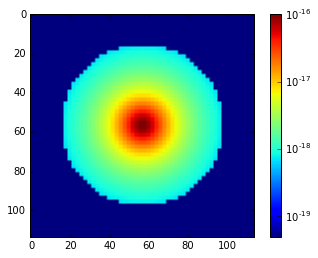

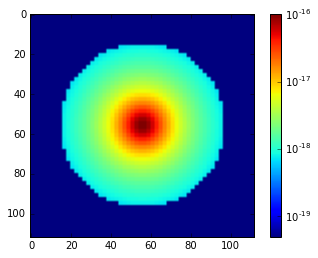

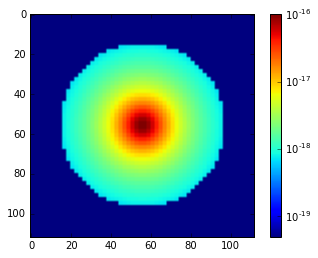

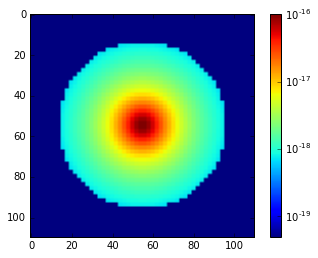

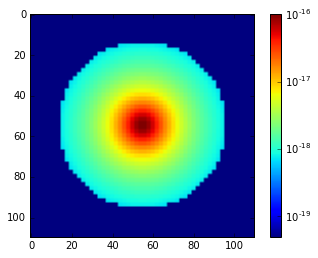

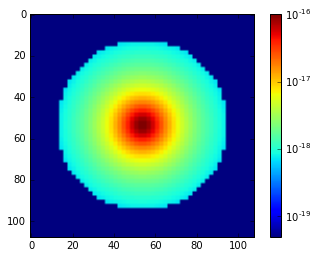

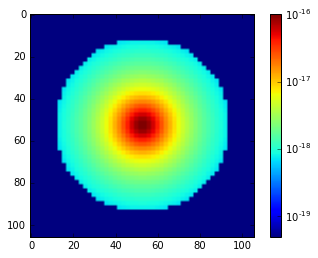

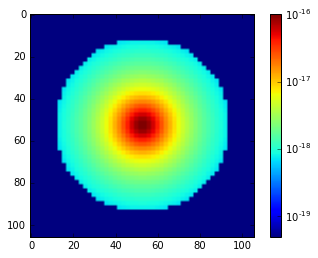

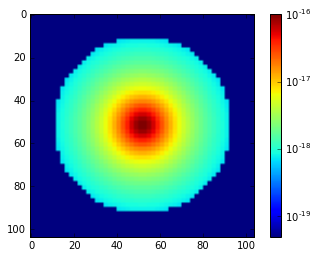

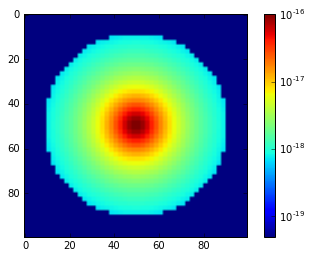

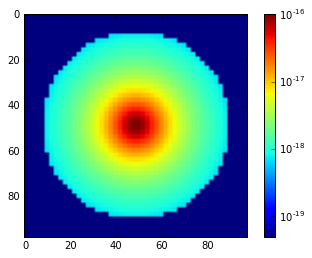

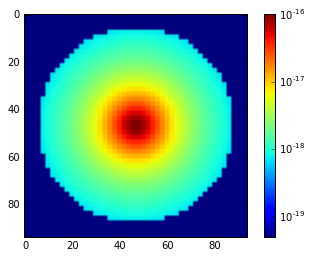

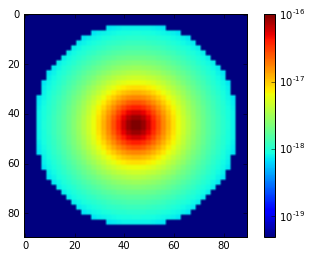

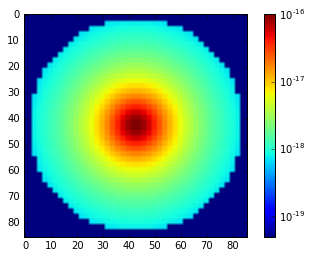

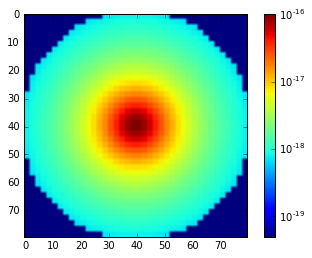

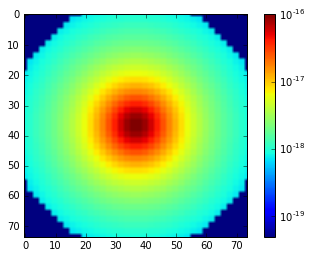

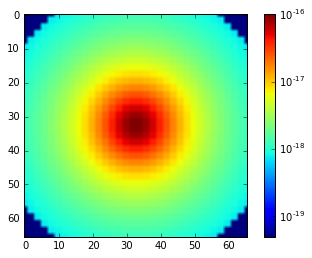

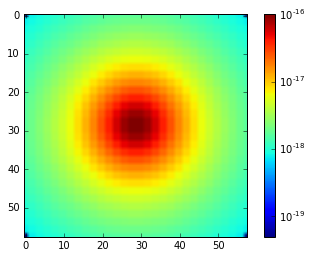

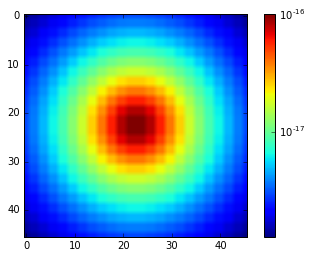

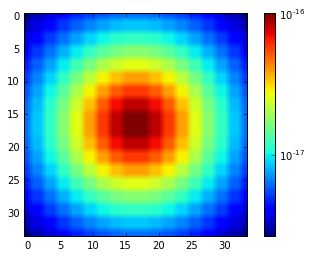

In [66]:
i =0 
boxlen=1.0e19
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
all_data = ds.covering_grid(level=lev, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
dens_arr =  np.array(all_data["density"])
lev = 5
dim = 2**(lev+3)
cell_size = int((ds.domain_width/dim)[0].in_cgs())
ri = 1.5998e18

xi_range = np.logspace(-0.1,np.log10(17),num=20)
r_range = xi_range/1.057E-17


ratio = boxlen/dim
for ri in r_range:
    plt.figure()
    margin = [int(ri/ratio)+70 if int(ri/ratio)+70 <127 else 0][0]
    start  = margin
    end = dim-margin
    print "(start,end):",start,end
    plt.imshow(dens_arr[start:end,dim/2,start:end],cmap=cm.jet,norm=LogNorm())
    plt.colorbar()

# Fatten = 1000

In [83]:
cd ~/StarFormationCode/FLASH/

/global/u2/d/dorislee/StarFormationCode/FLASH


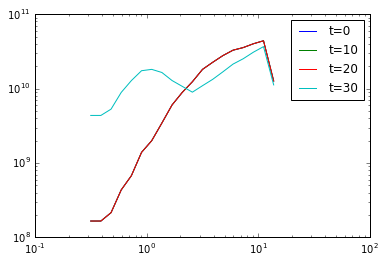

In [84]:
xi_range = np.logspace(-0.5,np.log10(17),num=20)
for s in [0,10,20,30]:
    data = np.loadtxt("../../project/FLASH4.3_2/object/fat1000/sum_args_list{}.txt".format(s))
    plt.loglog(xi_range,4*np.pi*G*data/a,label= "t={}".format(s))
plt.legend()

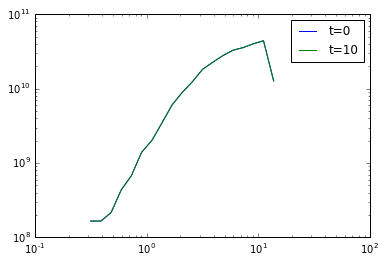

In [85]:
for s in [0,10]:#,20,30]:
    data = np.loadtxt("../../project/FLASH4.3_2/object/fat1000/sum_args_list{}.txt".format(s))
    plt.loglog(xi_range,4*np.pi*G*data/a,label= "t={}".format(s))
plt.legend()

so t = 0, 10, 20 all look the same and lie on top of each other. Only changes start happening after t=20. 

In [88]:
ls ../../project/FLASH4.3_2/object/fat1000/sum_args_list*

../../project/FLASH4.3_2/object/fat1000/sum_args_list0.txt
../../project/FLASH4.3_2/object/fat1000/sum_args_list10.txt
../../project/FLASH4.3_2/object/fat1000/sum_args_list20.txt
../../project/FLASH4.3_2/object/fat1000/sum_args_list22.txt
../../project/FLASH4.3_2/object/fat1000/sum_args_list24.txt
../../project/FLASH4.3_2/object/fat1000/sum_args_list26.txt
../../project/FLASH4.3_2/object/fat1000/sum_args_list28.txt
../../project/FLASH4.3_2/object/fat1000/sum_args_list30.txt
../../project/FLASH4.3_2/object/fat1000/sum_args_list31.txt


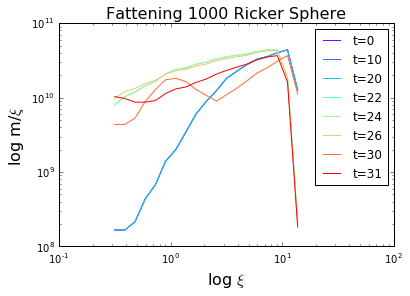

In [92]:
tlst = [0,10,20,22,24,26,30,31]
hsv = plt.get_cmap('rainbow')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("../../project/FLASH4.3_2/object/fat1000/sum_args_list{}.txt".format(s))
    plt.loglog(xi_range,4*np.pi*G*data/a,label= "t={}".format(s), color=c)
plt.legend()
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("Fattening 1000 Ricker Sphere",fontsize=16)

# Fatten =  100

chk file up to 40 

In [96]:
ls ../../project/FLASH4.3_2/object/fat100/sum_args_list*

../../project/FLASH4.3_2/object/fat100/sum_args_list0.txt
../../project/FLASH4.3_2/object/fat100/sum_args_list10.txt
../../project/FLASH4.3_2/object/fat100/sum_args_list20.txt
../../project/FLASH4.3_2/object/fat100/sum_args_list22.txt
../../project/FLASH4.3_2/object/fat100/sum_args_list24.txt
../../project/FLASH4.3_2/object/fat100/sum_args_list25.txt
../../project/FLASH4.3_2/object/fat100/sum_args_list26.txt
../../project/FLASH4.3_2/object/fat100/sum_args_list30.txt
../../project/FLASH4.3_2/object/fat100/sum_args_list34.txt
../../project/FLASH4.3_2/object/fat100/sum_args_list36.txt
../../project/FLASH4.3_2/object/fat100/sum_args_list38.txt
../../project/FLASH4.3_2/object/fat100/sum_args_list39.txt
../../project/FLASH4.3_2/object/fat100/sum_args_list40.txt


In [101]:
# xi_range = np.logspace(-0.5,np.log10(17),num=20)
# tlst = [0,10,20,22,24,25,26,30,34,36,38,39,40]
# hsv = plt.get_cmap('plasma')
# colors = hsv(np.linspace(0, 1.0, len(tlst)))
# for s , c in zip(tlst,colors):
#     data = np.loadtxt("../../project/FLASH4.3_2/object/fat100/sum_args_list{}.txt".format(s))
#     plt.loglog(xi_range,4*np.pi*G*data/a,label= "t={}".format(s), color=c)
# plt.legend(loc ="lower right")
# plt.xlabel(r"log $\xi$",fontsize=16)
# plt.ylabel(r"log m/$\xi$",fontsize=16)
# plt.title("Fattening 100 Ricker Sphere",fontsize=16)

# Fatten =31.6

chk file up to 247, but things go awry on or before 120 

In [151]:
ls ../../project/FLASH4.3_3/object/fat31/sum_args_list*

../../project/FLASH4.3_3/object/fat31/sum_args_list0_2.txt
../../project/FLASH4.3_3/object/fat31/sum_args_list100_2.txt
../../project/FLASH4.3_3/object/fat31/sum_args_list110_2.txt
../../project/FLASH4.3_3/object/fat31/sum_args_list20_2.txt
../../project/FLASH4.3_3/object/fat31/sum_args_list40_2.txt
../../project/FLASH4.3_3/object/fat31/sum_args_list60_2.txt
../../project/FLASH4.3_3/object/fat31/sum_args_list80_2.txt
../../project/FLASH4.3_3/object/fat31/sum_args_list84_2.txt
../../project/FLASH4.3_3/object/fat31/sum_args_list86_2.txt
../../project/FLASH4.3_3/object/fat31/sum_args_list88_2.txt
../../project/FLASH4.3_3/object/fat31/sum_args_list90_2.txt


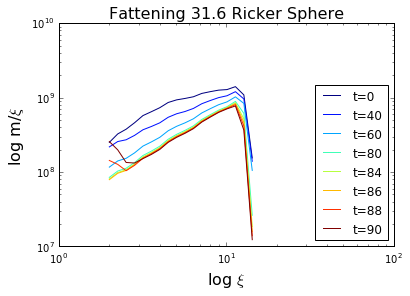

In [154]:
xi_range = np.logspace(-np.log10(0.5),np.log10(18),num=20)
tlst = [  0, 40,  60,  80,84,86,88, 90]
hsv = plt.get_cmap('jet')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("../../project/FLASH4.3_3/object/fat31/sum_args_list{}_2.txt".format(s))
    plt.loglog(xi_range,4*np.pi*G*data/a,label= "t={}".format(s), color=c)
plt.legend(loc ="lower right")
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("Fattening 31.6 Ricker Sphere",fontsize=16)

In [2]:
import plot

In [4]:
cd ../../project/FLASH4.3_3/object/fat31/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/object/fat31



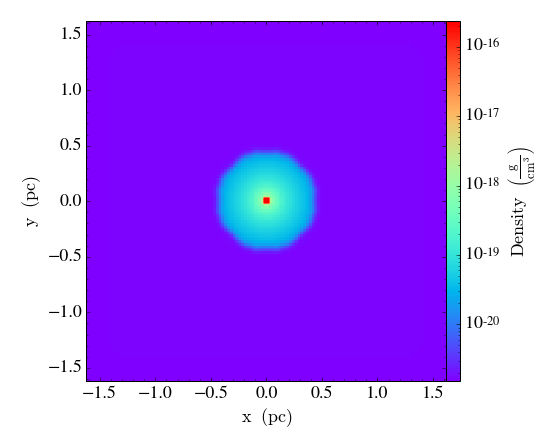


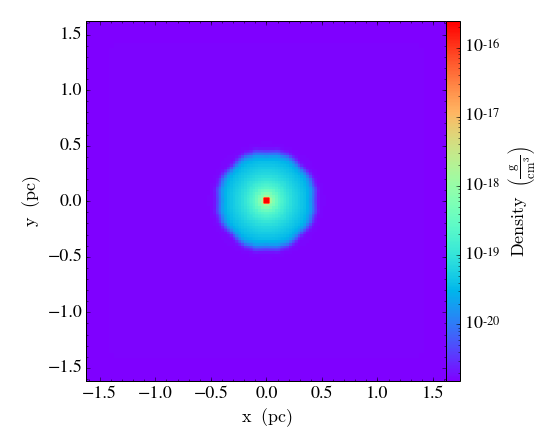


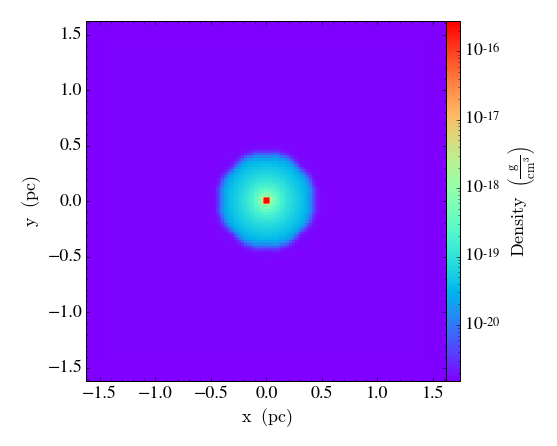

In [7]:
plot.plot_dens(78)
plot.plot_dens(80)
plot.plot_dens(85)

# Fatten =10

chk file up to 104

In [110]:
ls ../../project/FLASH4.3_2/object/fat10/sum_args_list*

../../project/FLASH4.3_2/object/fat10/sum_args_list0.txt
../../project/FLASH4.3_2/object/fat10/sum_args_list100.txt
../../project/FLASH4.3_2/object/fat10/sum_args_list20.txt
../../project/FLASH4.3_2/object/fat10/sum_args_list40.txt
../../project/FLASH4.3_2/object/fat10/sum_args_list60.txt
../../project/FLASH4.3_2/object/fat10/sum_args_list80.txt


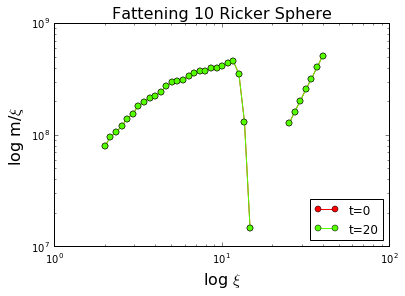

In [118]:
xi_range = np.logspace(-np.log10(0.5),np.log10(40),num=40)
tlst = [  0,  20]#,  40,  60,  80, 90,100,110]
hsv = plt.get_cmap('prism')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("../../project/FLASH4.3_2/object/fat10/sum_args_list{}.txt".format(s))
    plt.loglog(xi_range,4*np.pi*G*data/a,label= "t={}".format(s), color=c,marker = 'o')
plt.legend(loc ="lower right")
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("Fattening 10 Ricker Sphere",fontsize=16)

# Fatten  = 3

chk file up to 95 

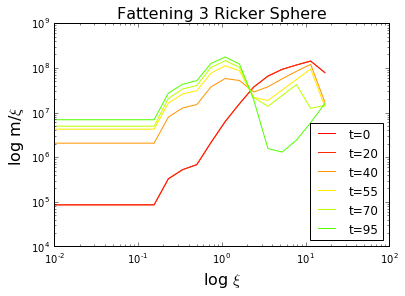

In [75]:
# tlst = [  0,  20,  40,  55,  70, 95]
# hsv = plt.get_cmap('prism')
# colors = hsv(np.linspace(0, 1.0, len(tlst)))
# for s , c in zip(tlst,colors):
#     data = np.loadtxt("../../project/FLASH4.3_2/object/fat3/sum_args_list{}_2.txt".format(s))
#     plt.loglog(xi_range,4*np.pi*G*data/a,label= "t={}".format(s), color=c)
# plt.legend(loc ="lower right")
# plt.xlabel(r"log $\xi$",fontsize=16)
# plt.ylabel(r"log m/$\xi$",fontsize=16)
# plt.title("Fattening 3 Ricker Sphere",fontsize=16)

Things to work on : 
    - Optimize by cropping out region depending on what r you're looking at 
    - finer resolution near xi =1 region 
    - for fattening = 1 case , lookin at what tff I'm using compare to ricker 
    - look into particle dump to spit result into plain text file 

# Fatten  = 1

In [125]:
ls ../../project/FLASH4.3_2/object/fat1/sum_args_list*

../../project/FLASH4.3_2/object/fat1/sum_args_list0_2.txt
../../project/FLASH4.3_2/object/fat1/sum_args_list100_2.txt
../../project/FLASH4.3_2/object/fat1/sum_args_list150_2.txt
../../project/FLASH4.3_2/object/fat1/sum_args_list200_2.txt
../../project/FLASH4.3_2/object/fat1/sum_args_list220_2.txt
../../project/FLASH4.3_2/object/fat1/sum_args_list240_2.txt
../../project/FLASH4.3_2/object/fat1/sum_args_list260_2.txt
../../project/FLASH4.3_2/object/fat1/sum_args_list280_2.txt
../../project/FLASH4.3_2/object/fat1/sum_args_list290_2.txt
../../project/FLASH4.3_2/object/fat1/sum_args_list300_2.txt
../../project/FLASH4.3_2/object/fat1/sum_args_list305_2.txt
../../project/FLASH4.3_2/object/fat1/sum_args_list50_2.txt


In [11]:
xi_range = np.logspace(np.log10(0.5),1,num=20)
print xi_range

[  0.5          0.58538996   0.6853628    0.802409     0.93944434
   1.09988257   1.28772042   1.5076372    1.76511135   2.06655692
   2.41948333   2.83268248   3.31644775   3.88283041   4.54593985
   5.32229507   6.23123616   7.29540614   8.54131497  10.        ]


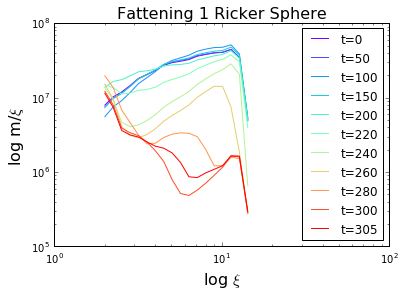

In [128]:
tlst = [  0, 50,  100, 150,200,220,240,260,280,300,305]
xi_range = np.logspace(-np.log10(0.5),np.log10(18),num=20)
hsv = plt.get_cmap('rainbow')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("../../project/FLASH4.3_2/object/fat1/sum_args_list{}_2.txt".format(s))
    plt.loglog(xi_range,4*np.pi*G*data/a,label= "t={}".format(s), color=c)
plt.legend(loc ="lower right")
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("Fattening 1 Ricker Sphere",fontsize=16)